In [2]:
# 1️⃣ Cài đặt các thư viện (chạy 1 lần)
# !pip install pandas numpy matplotlib seaborn plotly openpyxl

# 2️⃣ Import (tương đương library(...) trong R)
import pandas as pd          # tương đương readxl, dplyr, tidyr, reshape2
import numpy as np           # hỗ trợ reshape
import matplotlib.pyplot as plt  # tương đương ggplot2
import seaborn as sns        # giúp vẽ biểu đồ đẹp hơn
import plotly.express as px  # tương đương plotly (biểu đồ tương tác)


In [5]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
import pandas as pd

df = pd.read_excel("Online Retail.xlsx")


In [20]:
df = df[['CustomerID', 'InvoiceNo', 'StockCode', 'Quantity', 
         'UnitPrice', 'Description', 'InvoiceDate', 'Country']]


In [21]:
country = df["Country"]
country = df["Country"].drop_duplicates()
TotalAmount = df["Quantity"] * df["UnitPrice"]
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]
new_df = df[["CustomerID", "InvoiceNo", "StockCode", "Quantity", "TotalAmount", "InvoiceDate", "Country"]]
new_df2 = df
id(new_df2) == id(df)

True

In [26]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom


In [29]:
# Gom nhóm theo Country và tính tổng Quantity
country_price = (
    new_df
    .groupby('Country', as_index=False)
    .agg({'Quantity': 'sum'})
    .sort_values(by='Quantity', ascending=False)
)

# Xem kết quả
print(country_price.head())


           Country  Quantity
36  United Kingdom   4263829
24     Netherlands    200128
10            EIRE    142637
14         Germany    117448
13          France    110480


/tmp/ipykernel_4447/712288403.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4447/712288403.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


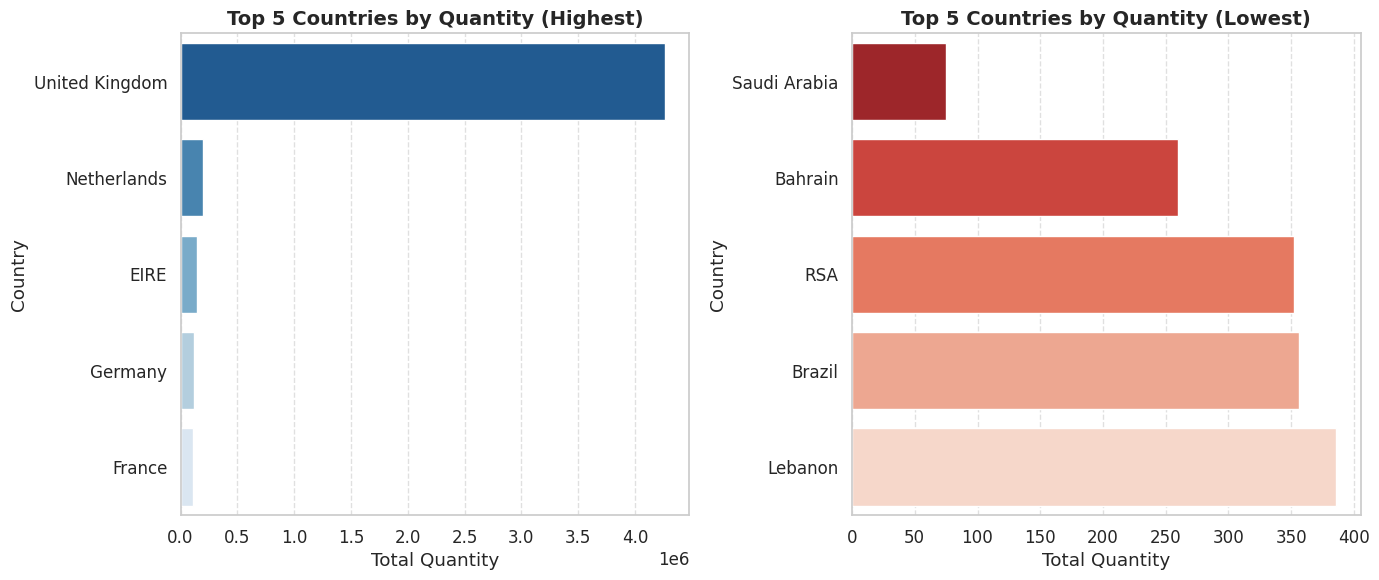

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy top 5 cao nhất & thấp nhất
top5_high = (
    country_price.sort_values(by='Quantity', ascending=False)  # giảm dần
                 .head(5)
                 .reset_index(drop=True)
)
top5_low = (
    country_price.sort_values(by='Quantity', ascending=True)  # tăng dần
                 .head(5)
                 .reset_index(drop=True)
)

# Thiết lập style
sns.set(style="whitegrid", font_scale=1.1)

# Tạo 2 biểu đồ song song
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# ========== Biểu đồ bên trái: Top 5 cao nhất ==========
sns.barplot(
    data=top5_high,
    y='Country',
    x='Quantity',
    palette=sns.color_palette("Blues_r", n_colors=5),
    order=top5_high['Country'],  # Giữ đúng thứ tự cao nhất → thấp nhất
    ax=axes[0]
)
axes[0].set_title("Top 5 Countries by Quantity (Highest)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Total Quantity")
axes[0].set_ylabel("Country")
axes[0].grid(axis='x', linestyle='--', alpha=0.6)
# ✅ KHÔNG invert trục y để giữ nước cao nhất ở TRÊN

# ========== Biểu đồ bên phải: Top 5 thấp nhất ==========
sns.barplot(
    data=top5_low,
    y='Country',
    x='Quantity',
    palette=sns.color_palette("Reds_r", n_colors=5),
    order=top5_low['Country'],  # Thứ tự nhỏ nhất → lớn hơn
    ax=axes[1]
)
axes[1].set_title("Top 5 Countries by Quantity (Lowest)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Total Quantity")
axes[1].set_ylabel("Country")
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

# Ẩn legend nếu có
for ax in axes:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Tinh chỉnh bố cục
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()


In [43]:
import pandas as pd

# Gom nhóm theo Country và tính tổng CustomerID
cus_id = (
    new_df
    .groupby('Country', as_index=False)
    .agg({'CustomerID': 'sum'})
    .sort_values(by='CustomerID', ascending=False)
)

# Xem trước dữ liệu
print(cus_id.head())


           Country    CustomerID
35  United Kingdom  5.626433e+09
14         Germany  1.200751e+08
10            EIRE  1.103917e+08
13          France  1.076489e+08
23     Netherlands  3.419054e+07


/tmp/ipykernel_4447/3375988135.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_4447/3375988135.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


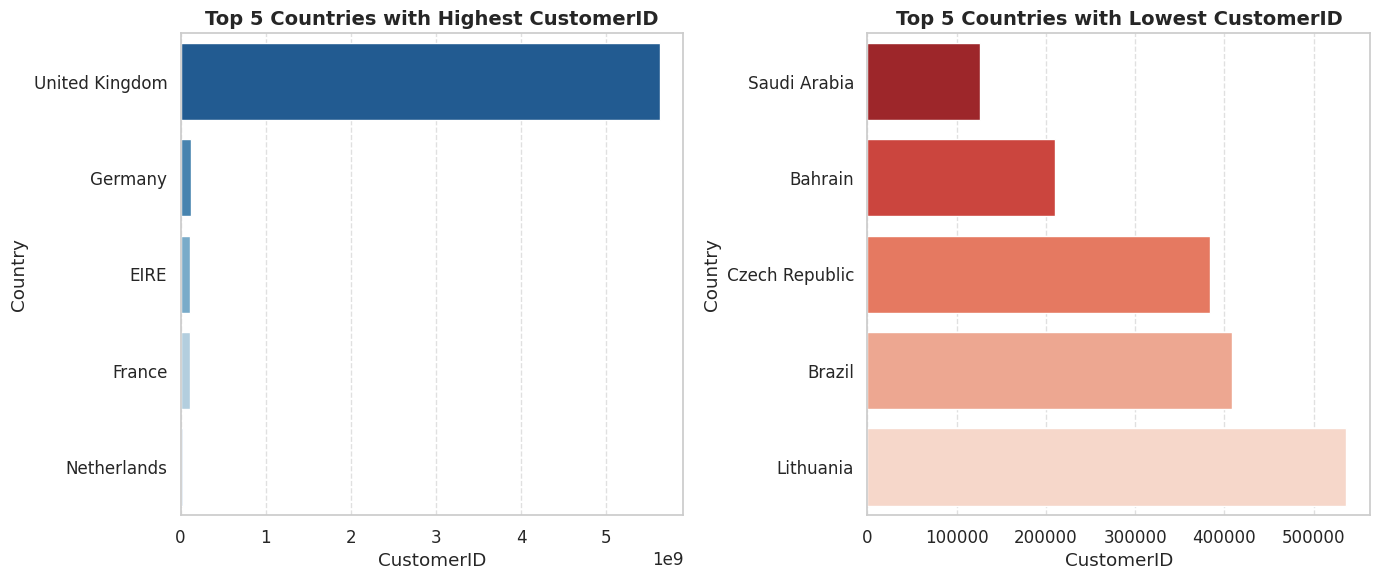

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lấy đúng 5 quốc gia cao nhất và thấp nhất
top5_cus = (
    cus_id.sort_values(by='CustomerID', ascending=False)
          .head(5)
          .sort_values(by='CustomerID', ascending=False)
          .reset_index(drop=True)
)
low5_cus = (
    cus_id.sort_values(by='CustomerID', ascending=True)
          .head(5)
          .sort_values(by='CustomerID', ascending=True)
          .reset_index(drop=True)
)

# Thiết lập style
sns.set(style="whitegrid", font_scale=1.1)

# Tạo figure gồm 2 biểu đồ song song
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# ========== Biểu đồ bên trái: Top 5 cao nhất ==========
sns.barplot(
    data=top5_cus,
    y='Country',
    x='CustomerID',
    palette=sns.color_palette("Blues_r", n_colors=5),
    ax=axes[0]
)
axes[0].set_title("Top 5 Countries with Highest CustomerID", fontsize=14, fontweight='bold')
axes[0].set_xlabel("CustomerID")
axes[0].set_ylabel("Country")  # ✅ hiện tên quốc gia ở bên trái biểu đồ
axes[0].grid(axis='x', linestyle='--', alpha=0.6)
# ⚠️ Bỏ dòng invert_xaxis và yaxis.tick_right để nhãn nằm bên trái
# axes[0].invert_xaxis()
# axes[0].yaxis.tick_right()

# ========== Biểu đồ bên phải: Top 5 thấp nhất ==========
sns.barplot(
    data=low5_cus,
    y='Country',
    x='CustomerID',
    palette=sns.color_palette("Reds_r", n_colors=5),
    ax=axes[1]
)
axes[1].set_title("Top 5 Countries with Lowest CustomerID", fontsize=14, fontweight='bold')
axes[1].set_xlabel("CustomerID")
axes[1].set_ylabel("Country")  # ✅ nhãn bên trái biểu đồ
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

# Ẩn legend (nếu có)
for ax in axes:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Giảm khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()
